# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Business Analytics</font>

# <font color='blue'>Capítulo 3</font>

### Estudo Dirigido - Simulação de Monte Carlo e Séries Temporais Para Modelagem Financeira

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.6


> Todos os detahes sobre este projeto estão no manual em pdf no item anterior.


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

### Carregando os Pacotes

In [3]:
# Imports para manipulação de dados
import numpy as np
import pandas as pd

# Imports para visualização
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

# Imports para cálculos estatísticos
import scipy
from scipy.stats import kurtosis, skew, shapiro
import warnings
warnings.filterwarnings("ignore")

# Imports para formatação dos gráficos
plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

numpy      1.18.2
scipy      1.4.1
pandas     1.0.3
matplotlib 3.2.1
seaborn    0.10.0
Data Science Academy


### Carregando os Dados

In [5]:
# Carrega o dataset
# Obs: O valor das ações foi ajustado para facilitar a criação dos gráficos de forma didática
dados = pd.read_csv("dados/dataset.csv", parse_dates = True, index_col = "Data")

In [6]:
# Visualizando registros
# Cada coluna representa o valor da ação em cada dia da série.
# valor de abertura, fechamento, máximo, mínimo e volume. 
# A coluna Mudanca(%) representa a variação diária.
dados.head()

,Abertura,Fechamento,Maximo,Minimo,Volume,Mudanca(%)
Data,,,,,,
2020-03-10,276.0,270.3,280.0,268.0,109.42,0.00
2020-03-10,275.0,270.3,280.0,268.0,124.56,0.11
2020-03-09,266.0,270.0,284.0,259.5,191.21,-7.91
2020-03-06,294.6,293.2,294.9,283.0,104.89,-1.48
2020-03-05,303.0,297.6,305.5,294.2,90.58,0.68


In [7]:
# Tipos de Dados
dados.dtypes

Abertura      float64
Fechamento    float64
Maximo        float64
Minimo        float64
Volume        float64
Mudanca(%)    float64
dtype: object

In [8]:
# Shape
dados.shape

(5037, 6)

In [9]:
# Sumário estatístico
dados.describe()

,Abertura,Fechamento,Maximo,Minimo,Volume,Mudanca(%)
count,5037.000000,5037.000000,5037.000000,5037.000000,5037.000000,5037.000000
mean,35.002488,35.001910,35.589655,34.377016,9.748444,0.152400
std,62.600066,62.596556,63.605892,61.530026,26.663983,4.423538
min,0.640000,0.640000,0.670000,0.620000,0.000000,-61.630000
25%,2.960000,2.980000,3.050000,2.900000,0.310000,-1.520000
50%,6.320000,6.280000,6.460000,6.130000,1.230000,0.000000
75%,25.820000,25.890000,26.270000,25.530000,5.840000,1.490000
max,330.600000,331.000000,336.000000,326.600000,711.800000,48.070000


## Visualizando o Preço Diário de Fechamento das Ações no Tempo

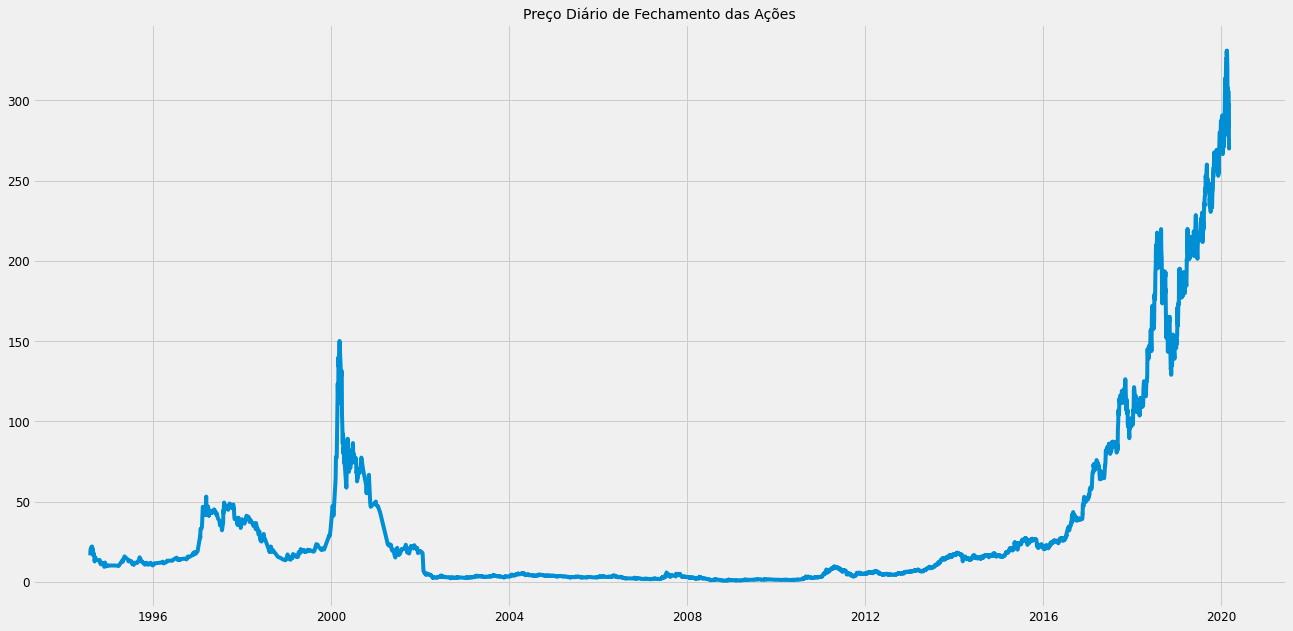

In [10]:
# Plot
plt.plot(dados["Fechamento"])
plt.title("Preço Diário de Fechamento das Ações", size = 14)
plt.show()

Vamos calcular o retorno diário da série.

In [11]:
# Calculando o percentual de mudança na cotação de fechamento diário das ações
# Ou seja, quanto o valor de fechamento varia de um dia para outro, o retorno diário da ação
retorno_diario = dados["Fechamento"].pct_change().dropna()
retorno_diario.head()

Data
2020-03-10    0.000000
2020-03-09   -0.001110
2020-03-06    0.085926
2020-03-05    0.015007
2020-03-04   -0.006720
Name: Fechamento, dtype: float64

Vamos calcular o retorno acumulado da série.

In [12]:
# Retorno acumulado
retorno_diario_acumulado = (1 + retorno_diario).cumprod() - 1
retorno_diario_acumulado.max()

0.2245652978172401

### Análise Exploratória e Estatística Descritiva

Vamos usar a estatística para calcular o retorno médio e a variação (desvio padrão).

In [13]:
# Média do fechamento diário da cotação das ações
media_retorno_diario = np.mean(retorno_diario)

In [14]:
# Desvio padrão do fechamento diário da cotação das ações
desvio_retorno_diario = np.std(retorno_diario)

In [15]:
# Média e desvio padrão
print("Média do Retorno de Fechamento:", media_retorno_diario)
print("Desvio Padrão do Retorno de Fechamento:", desvio_retorno_diario)

Média do Retorno de Fechamento: 0.00045753294896881046
Desvio Padrão do Retorno de Fechamento: 0.047851416559428164


Vamos considerar o ano com 252 dias de funcionamento da bolsa americana.

In [16]:
# Média e desvio padrão no ano (considerando 252 dias úteis de operações na bolsa americana)
print("Retorno Médio Anualizado de Fechamento:", (1 + media_retorno_diario) ** 252 - 1)
print("Desvio Padrão Anualizado de Fechamento:", desvio_retorno_diario*np.sqrt(252))

Retorno Médio Anualizado de Fechamento: 0.12217855548103884
Desvio Padrão Anualizado de Fechamento: 0.7596176885904296


Embora nos últimos anos a performance das ações tenha sido boa, na média o ganho tem sido baixo, embora positivo. No longo prazo o investidor não perdeu dinheiro. Vamos criar um plot com o Retorno Diário.

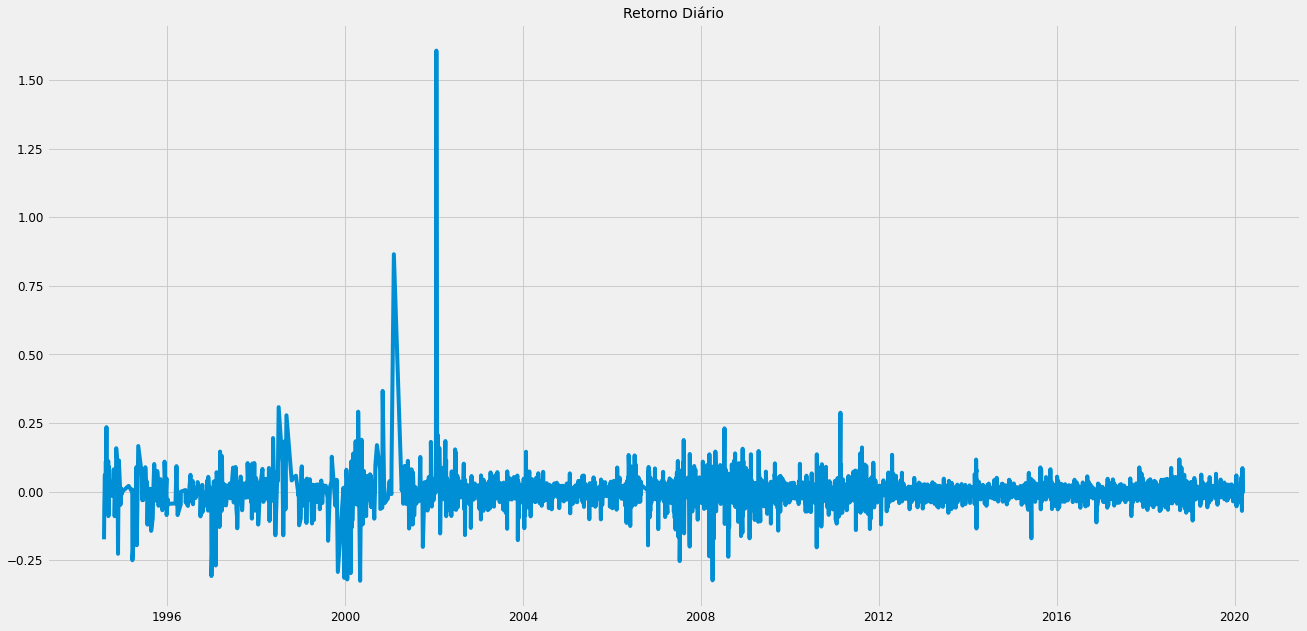

In [17]:
# Plot
plt.plot(retorno_diario)
plt.title("Retorno Diário", size = 14)
plt.show()

Com apenas duas grandes variações, o retorno diário tem sido constante ao longo do tempo. Vamos criar um histograma com a dstribuição do retorno diário.

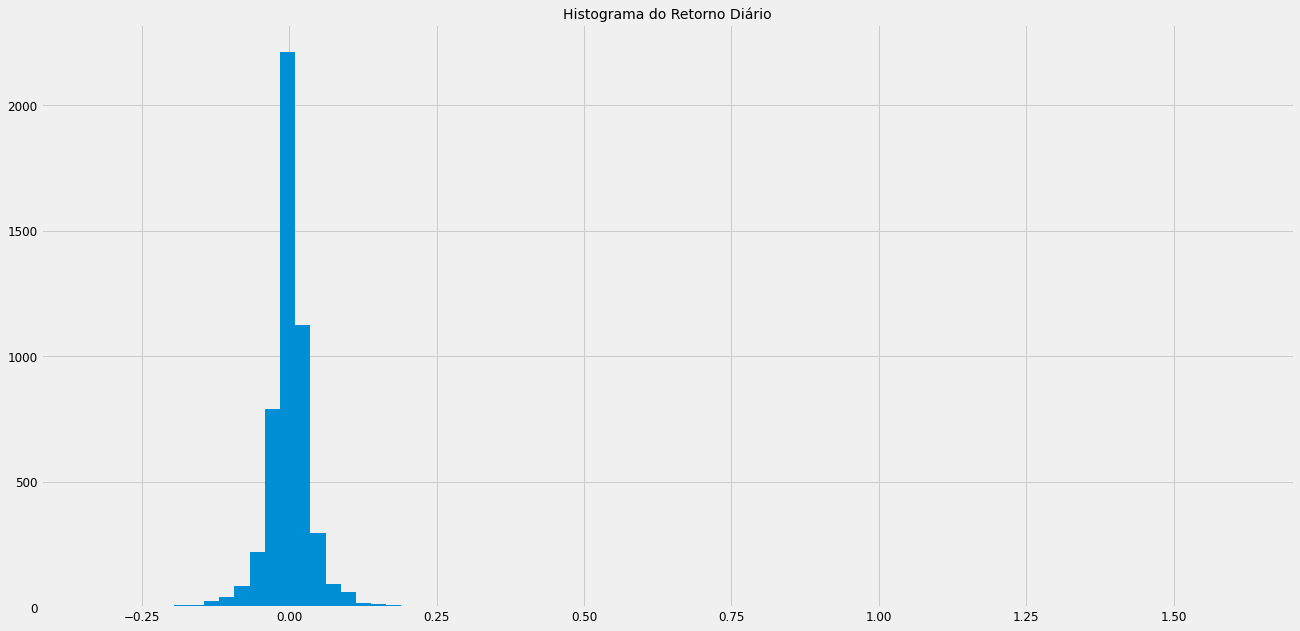

In [18]:
# Plot
plt.hist(retorno_diario, bins = 75)
plt.title("Histograma do Retorno Diário", size = 14)
plt.show()

Os valores estão bem próximos mesmo da média. Mas vamos confirmar isso calculando curtose e assimetria.

In [19]:
# Calculando curtose e assimetria
print("Curtose:", kurtosis(retorno_diario))
print("Assimetria:", skew(retorno_diario))

Curtose: 278.4606940718125
Assimetria: 8.379693825200768


A curtose indica que os registros estão bem próximos da média. Mas a assimetria indica que os dados estão bem distorcidos e distantes de uma distribuição normal. Vamos aplicar o teste de normalidade na série.

### Teste de Normalidade Shapiro-Wilk 

In [20]:
# Executa o teste de normalidade para a série
teste_normalidade = shapiro(retorno_diario)[1]

# Verifica o retorno com base no valor-p de 0.05
if teste_normalidade <= 0.05:
    print("Rejeitamos a Hipótese Nula de Normalidade dos Dados.")
else:
    print("Falhamos em Rejeitar a Hipótese Nula de Normalidade dos Dados.")

Rejeitamos a Hipótese Nula de Normalidade dos Dados.


Como imaginávamos a distribuição não é normal. Vamos aplicar uma transformação de log à série e então aplicar a técnica de diferenciação para retirar da série os padrões de tendência e deixarmos apenas os dados reais, que nos interessam. Com isso calculamos o retorno diário.

In [21]:
# Transformação de log e diferenciação para cálculo do retorno diário
log_retorno_diario = (np.log(dados["Fechamento"]) - np.log(dados["Fechamento"]).shift(-1)).dropna()

# Calculamos média e desvio padrão após a transformação
log_media_retorno_diario = np.mean(log_retorno_diario)
log_desvio_retorno_diario = np.std(log_retorno_diario)

Vamos criar um plot com o retorno diário da série transformada.

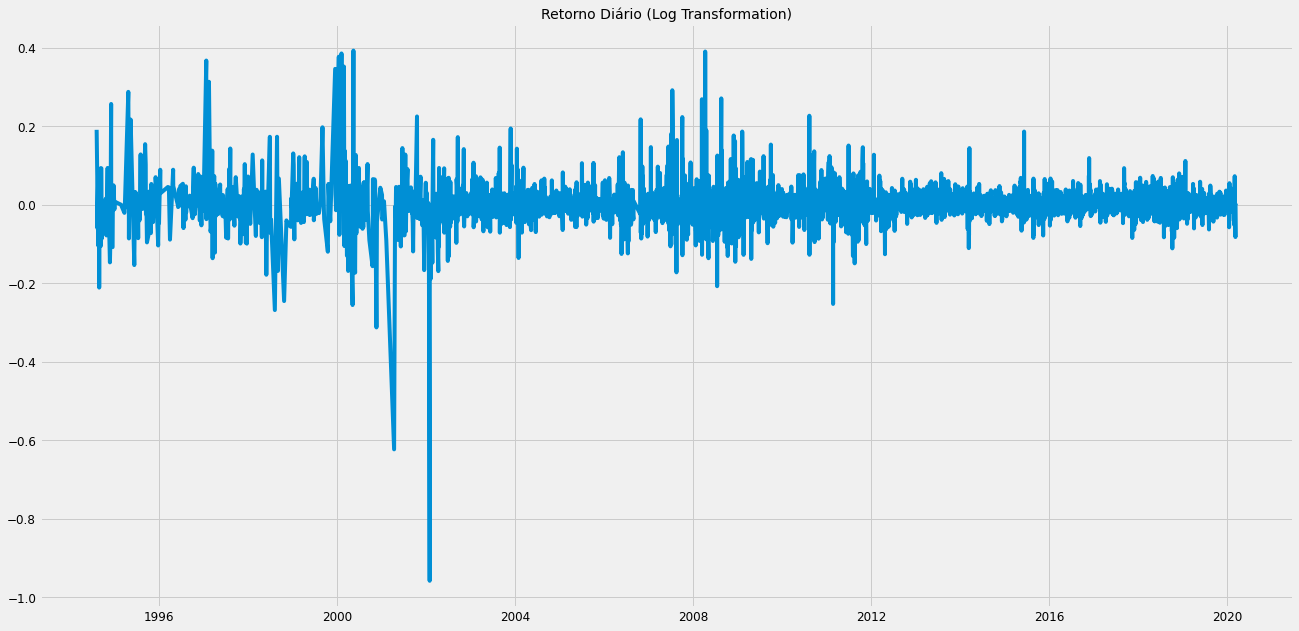

In [22]:
# Plot
plt.plot(log_retorno_diario)
plt.title("Retorno Diário (Log Transformation)", size = 14)
plt.show()

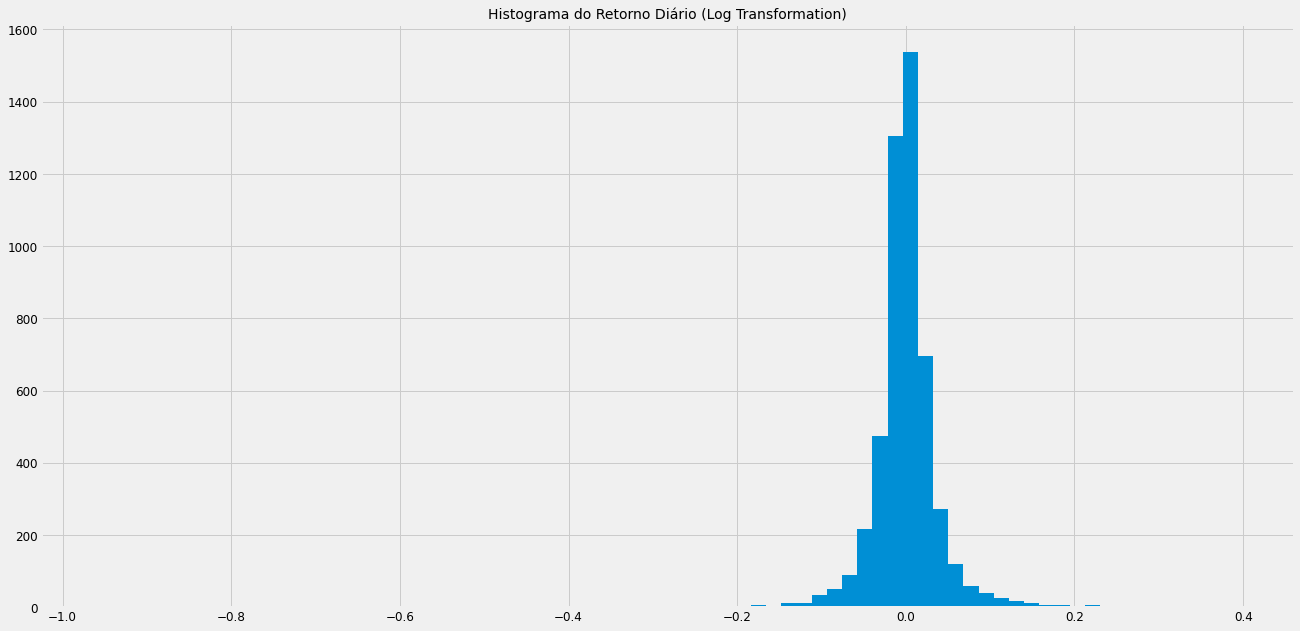

In [23]:
# Plot
plt.hist(log_retorno_diario, bins = 75)
plt.title("Histograma do Retorno Diário (Log Transformation)", size = 14)
plt.show()

In [24]:
# Calculando curtose e assimetria
print("Curtose:", kurtosis(log_retorno_diario))
print("Assimetria:", skew(log_retorno_diario))

Curtose: 63.102709019136654
Assimetria: -1.3916921515501128


In [25]:
# Executa o teste de normalidade para a série
teste_normalidade = shapiro(log_retorno_diario)[1]

# Verifica o retorno com base no valor-p de 0.05
if teste_normalidade <= 0.05:
    print("Rejeitamos a Hipótese Nula de Normalidade dos Dados.")
else:
    print("Falhamos em Rejeitar a Hipótese Nula de Normalidade dos Dados.")

Rejeitamos a Hipótese Nula de Normalidade dos Dados.


Os dados ainda não são normais, porém reduzimos a distorção dos dados. Poderíamos aplicar outras transformações, mas para o objetivo este estudo isso é suficiente. Seguimos com a série transformada.

### Valor Histórico

Vamos calcular o valor histórico do preço da ação.

In [26]:
# Nível de variância
var_level = 95
var = np.percentile(log_retorno_diario, 100 - var_level)
print("Certeza de que as perdas diárias não excederão o VaR% em um determinado dia com base em valores históricos.")
print("VaR 95%:", var)

Certeza de que as perdas diárias não excederão o VaR% em um determinado dia com base em valores históricos.
VaR 95%: -0.05391118257211601


In [27]:
# Var para os próximos 5 dias
var * np.sqrt(5)

-0.12054906897865336

### Valor Histórico Condicional

In [28]:
# Nível de variância
var_level = 95
var = np.percentile(log_retorno_diario, 100 - var_level)
cvar = log_retorno_diario[log_retorno_diario < var].mean()
print("Nos piores 5% dos casos, as perdas foram, em média, superiores ao percentual histórico.")
print("CVaR 95%:", cvar)

Nos piores 5% dos casos, as perdas foram, em média, superiores ao percentual histórico.
CVaR 95%: -0.09528907737617054


### Monte Carlo simulation

In [29]:
# Simulação de Monte Carlo

# Número de dias a frente
dias_posteriores = 252

# Número de simulações
simulacoes = 2500

# Último valor da ação
ultimo_preco = 270.3

# Cria um array vazio com as dimensões 
results = np.empty((simulacoes, dias_posteriores))

# Loop por cada simulação
for s in range(simulacoes):
    
    # Calcula o retorno com dados randômicos seguindo uma distribuição normal
    random_returns = 1 + np.random.normal(loc = log_media_retorno_diario, 
                                          scale = log_desvio_retorno_diario, 
                                          size = dias_posteriores)
    
    result = ultimo_preco * (random_returns.cumprod())
    
    results[s, :] = result

In [30]:
# Definindo o índice da série simulada
index = pd.date_range("2020-03-11", periods = dias_posteriores, freq = "D")
resultados = pd.DataFrame(results.T, index = index)
media_resultados = resultados.apply("mean", axis = 1)

## Resultado da Simulação de Monte Carlo

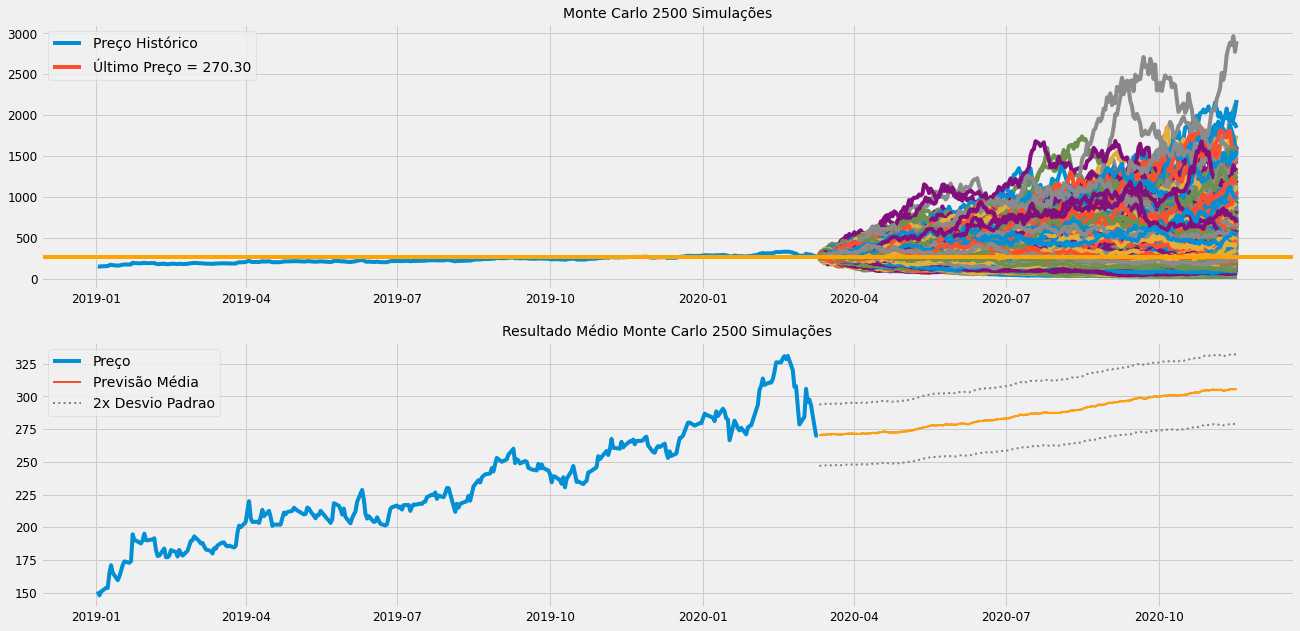

In [31]:
# Dividindo a área de plotagem em 2 subplots
fig, ax = plt.subplots(nrows = 2, ncols = 1)

# Plot
ax[0].plot(dados["Fechamento"][:"2018-12-31"])

ax[0].plot(resultados)

ax[0].axhline(270.30, c = "orange")

ax[0].set_title(f"Monte Carlo {simulacoes} Simulações", size = 14)

ax[0].legend(["Preço Histórico", "Último Preço = 270.30"])

ax[1].plot(dados["Fechamento"][:"2018-12-31"])

ax[1].plot(resultados.apply("mean", axis = 1), lw = 2)

ax[1].plot(media_resultados.apply((lambda x: x * (1+1.96 * log_desvio_retorno_diario))), 
           lw = 2, linestyle = "dotted", c = "gray")

ax[1].plot(media_resultados, lw = 2, c = "orange")

ax[1].plot(media_resultados.apply((lambda x: x * (1-1.96 * log_desvio_retorno_diario))), 
           lw = 2, linestyle = "dotted", c = "gray")

ax[1].set_title(f"Resultado Médio Monte Carlo {simulacoes} Simulações", size = 14)

ax[1].legend(["Preço", "Previsão Média", "2x Desvio Padrao"])

plt.show()

A previsão é positiva com os dados simulados e no longo prazo as ações da CDR tendem a valorizar. Mas não espere um grande retorno dessas ações.

# Fim

### Obrigado - Data Science Academy - <a href="http://facebook.com/dsacademybr">facebook.com/dsacademybr</a>